# Predicting MBTI Personality Types from Demographics and Interests: A 100K+ Sample Study

## 1. Problem
> Based on the parameters of the data, can we predict what personality type do the people have?

## 2. Data
This synthetic dataset is designed to explore and predict Myers-Briggs Type Indicator (MBTI) personality types based on a combination of demographic factors, interest areas, and personality scores. It includes 100K+ samples, each representing an individual with various features that contribute to determining their MBTI type. The dataset can be used to study correlations between different personality dimensions and external factors such as age, gender, education, and interests.

You can find the dataset here: [People Personality Type Dataset](https://www.kaggle.com/datasets/stealthtechnologies/predict-people-personality-types/data)

## 3. Evaluation 
> If we can reach 90%+ accuracy at predicting the personality type, then we will pursue the project.

## 4. Features
### Feature Descriptions
**Age**: A continuous variable representing the age of the individual.

**Gender**: A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

**Education**: A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

**Interest**: A categorical variable representing the individual's primary area of interest.

**Introversion Score**: A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

**Sensing Score**: A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

**Thinking Score**: A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

**Judging Score**: A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

**Personality**: Target that contains People Personality Type

## Personality Types
Combining these preferences results in 16 distinct personality types:

* ISTJ (Introverted, Sensing, Thinking, Judging): The Inspector - Responsible, organized, and practical.

* ISFJ (Introverted, Sensing, Feeling, Judging): The Protector - Compassionate, detail-oriented, and loyal.

* INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.

* INTJ (Introverted, Intuition, Thinking, Judging): The Architect - Strategic, analytical, and independent.

* ISTP (Introverted, Sensing, Thinking, Perceiving): The Virtuoso - Adventurous, logical, and hands-on.

* ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.

* INFP (Introverted, Intuition, Feeling, Perceiving): The Mediator - Creative, empathetic, and idealistic.

* INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.

* ESTP (Extraverted, Sensing, Thinking, Perceiving): The Entrepreneur - Energetic, pragmatic, and action-oriented.

* ESFP (Extraverted, Sensing, Feeling, Perceiving): The Entertainer - Sociable, lively, and spontaneous.

* ENFP (Extraverted, Intuition, Feeling, Perceiving): The Campaigner - Enthusiastic, imaginative, and sociable.

* ENTP (Extraverted, Intuition, Thinking, Perceiving): The Debater - Innovative, energetic, and intellectually curious.

* ESTJ (Extraverted, Sensing, Thinking, Judging): The Executive - Organized, assertive, and pragmatic.

* ESFJ (Extraverted, Sensing, Feeling, Judging): The Consul - Caring, social, and organized.

* ENFJ (Extraverted, Intuition, Feeling, Judging): The Protagonist - Charismatic, empathetic, and organized.

* ENTJ (Extraverted, Intuition, Thinking, Judging): The Commander - Confident, strategic, and decisive.

## Preparing the tools

We are going to get our tools ready for modelling, analysis, preprocessing and evaluation

In [50]:
# Import all the tools we need

# Regular EDA and visuzalization tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

## Load the data

In [2]:
df = pd.read_csv("data.csv")
df.shape

(128061, 9)

## Data Exploration 
We are going to some EDA (Exploratory Data Analysis)

In [3]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
df.tail()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ
128060,27.0,Male,0,7.78827,4.770737,3.18600,6.204355,Others,ENFJ


In [5]:
# Check out the Target variable counts
df["Personality"].value_counts()

Personality
ENFP    34404
ENTP    24718
INFP    24711
INTP    17132
ESFP     4832
ENFJ     3883
ISFP     3456
ESTP     3334
INFJ     2919
ENTJ     2783
ISTP     2390
INTJ     1920
ESFJ      554
ESTJ      392
ISFJ      371
ISTJ      262
Name: count, dtype: int64

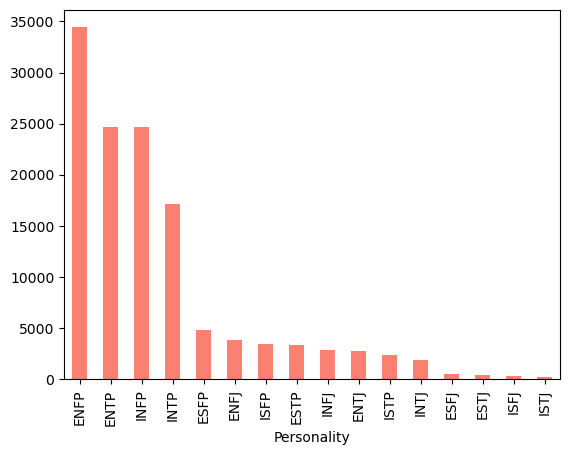

In [6]:
# Visualize the target variable
df["Personality"].value_counts().plot(kind="bar",color = "salmon");

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [8]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [9]:
# Are there any missing values?
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

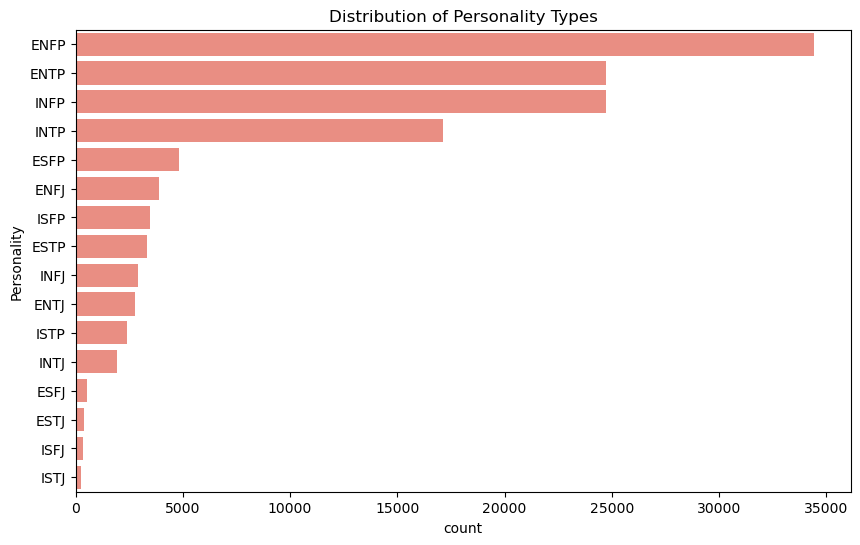

In [10]:
# Check the dirstribution of personality types (Target Variable)
plt.figure(figsize=(10,6))
sns.countplot(y=df['Personality'], order=df['Personality'].value_counts().index, color="Salmon")
plt.title('Distribution of Personality Types')
plt.show()

## Personality type according to gender
Let's compare the target column with the gender coloumn

In [11]:
cross_tab = pd.crosstab(df.Personality, df.Gender)
cross_tab

Gender,Female,Male
Personality,,
ENFJ,1770,2113
ENFP,15509,18895
ENTJ,1526,1257
ENTP,13537,11181
ESFJ,237,317
ESFP,2128,2704
ESTJ,215,177
ESTP,1896,1438
INFJ,1003,1916


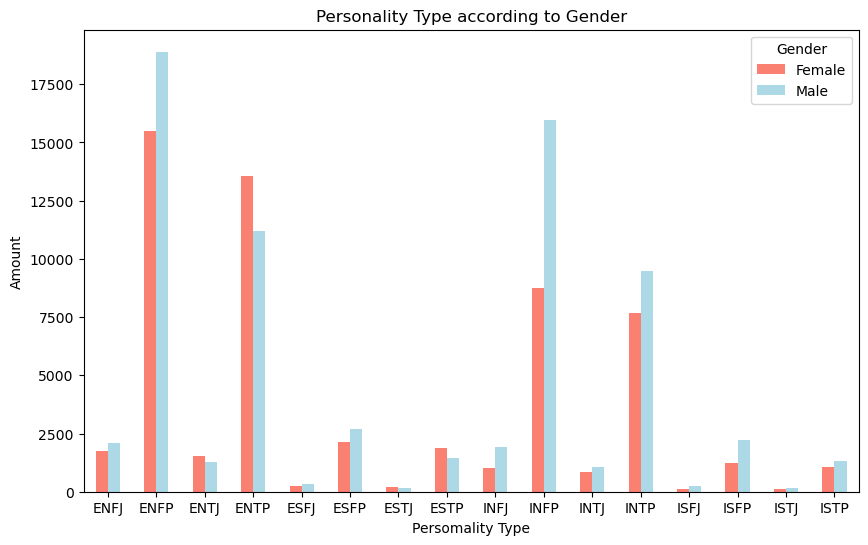

In [12]:
# Let's visualize the comparison for more better understanding
cross_tab.plot(kind="bar",
        figsize=(10,6),
        color = ["salmon","lightblue"])
plt.title("Personality Type according to Gender")
plt.xlabel("Persomality Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

let's compare more coloumns to the target column

In [13]:
cross_tab2 = pd.crosstab(df.Personality,df.Age)
cross_tab2

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,56.0,57.0
Personality,,,,,,,,,,,,,,,,,,,,,
ENFJ,12,75,215,342,432,360,371,327,275,248,...,2,2,1,0,0,0,0,0,0,0
ENFP,113,661,1900,3321,3459,3483,3137,2766,2411,2143,...,13,4,4,2,0,0,1,0,1,1
ENTJ,9,49,146,262,294,281,250,224,198,159,...,1,1,1,0,0,0,0,0,0,0
ENTP,88,481,1422,2286,2471,2457,2286,1925,1771,1579,...,7,4,0,4,0,1,0,0,0,0
ESFJ,0,0,0,0,13,24,48,63,53,50,...,1,0,0,0,0,0,0,0,0,0
ESFP,0,0,0,0,126,210,340,390,507,536,...,4,1,1,0,0,0,0,0,0,0
ESTJ,0,0,0,0,9,24,22,42,36,34,...,0,0,0,0,0,0,0,0,0,0
ESTP,0,0,0,0,88,153,239,290,325,407,...,2,1,1,1,1,0,0,1,0,0
INFJ,10,69,153,259,283,296,270,214,234,217,...,0,1,1,0,0,0,0,0,0,0


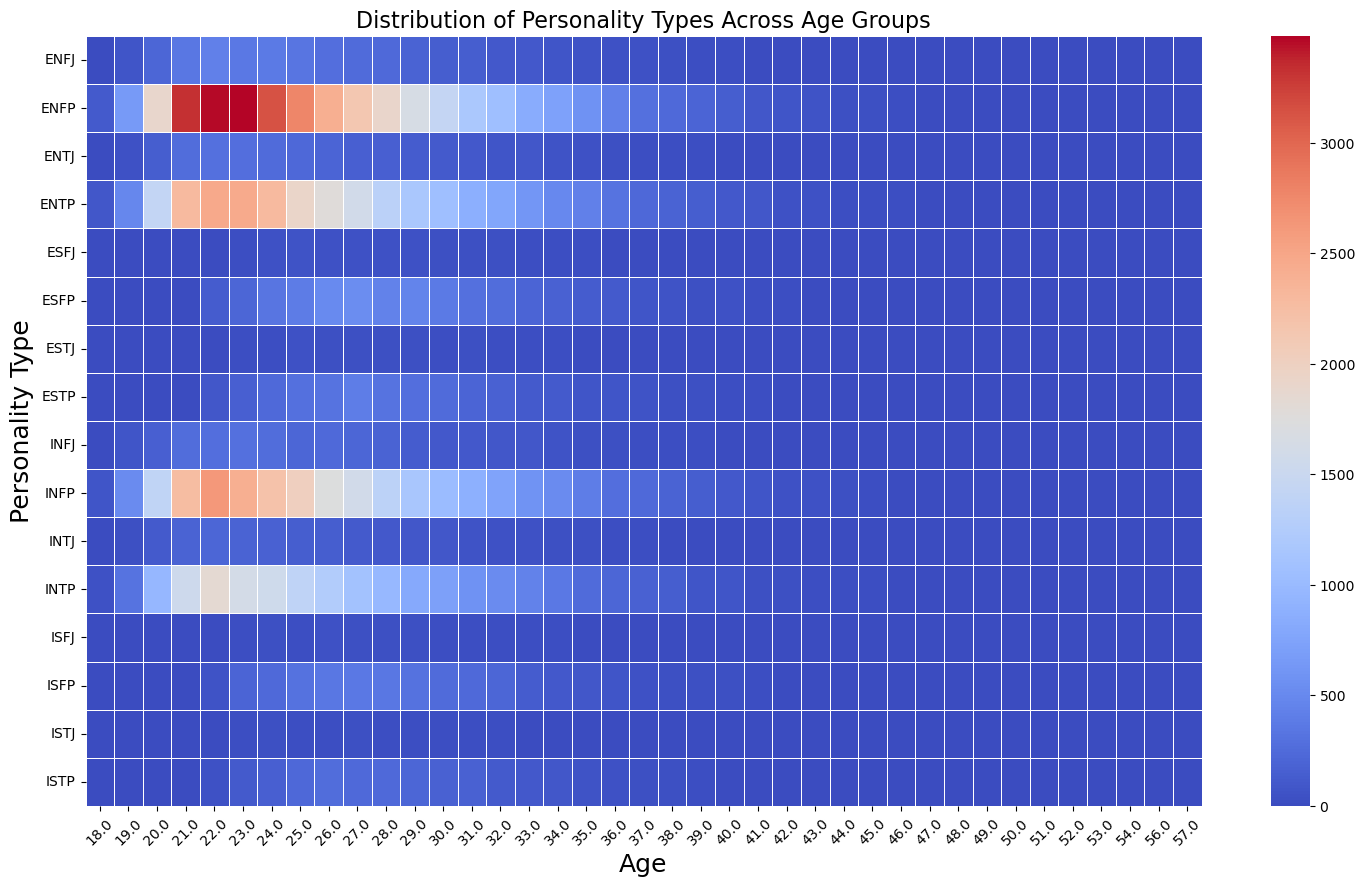

In [14]:
# Check the distribution of personality types acorss age
plt.figure(figsize=(18, 10))
sns.heatmap(cross_tab2, cmap='coolwarm', annot=False, linewidths=.5)

plt.title('Distribution of Personality Types Across Age Groups', fontsize=16)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Personality Type', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

Now let's check the distribution of the numerical columns

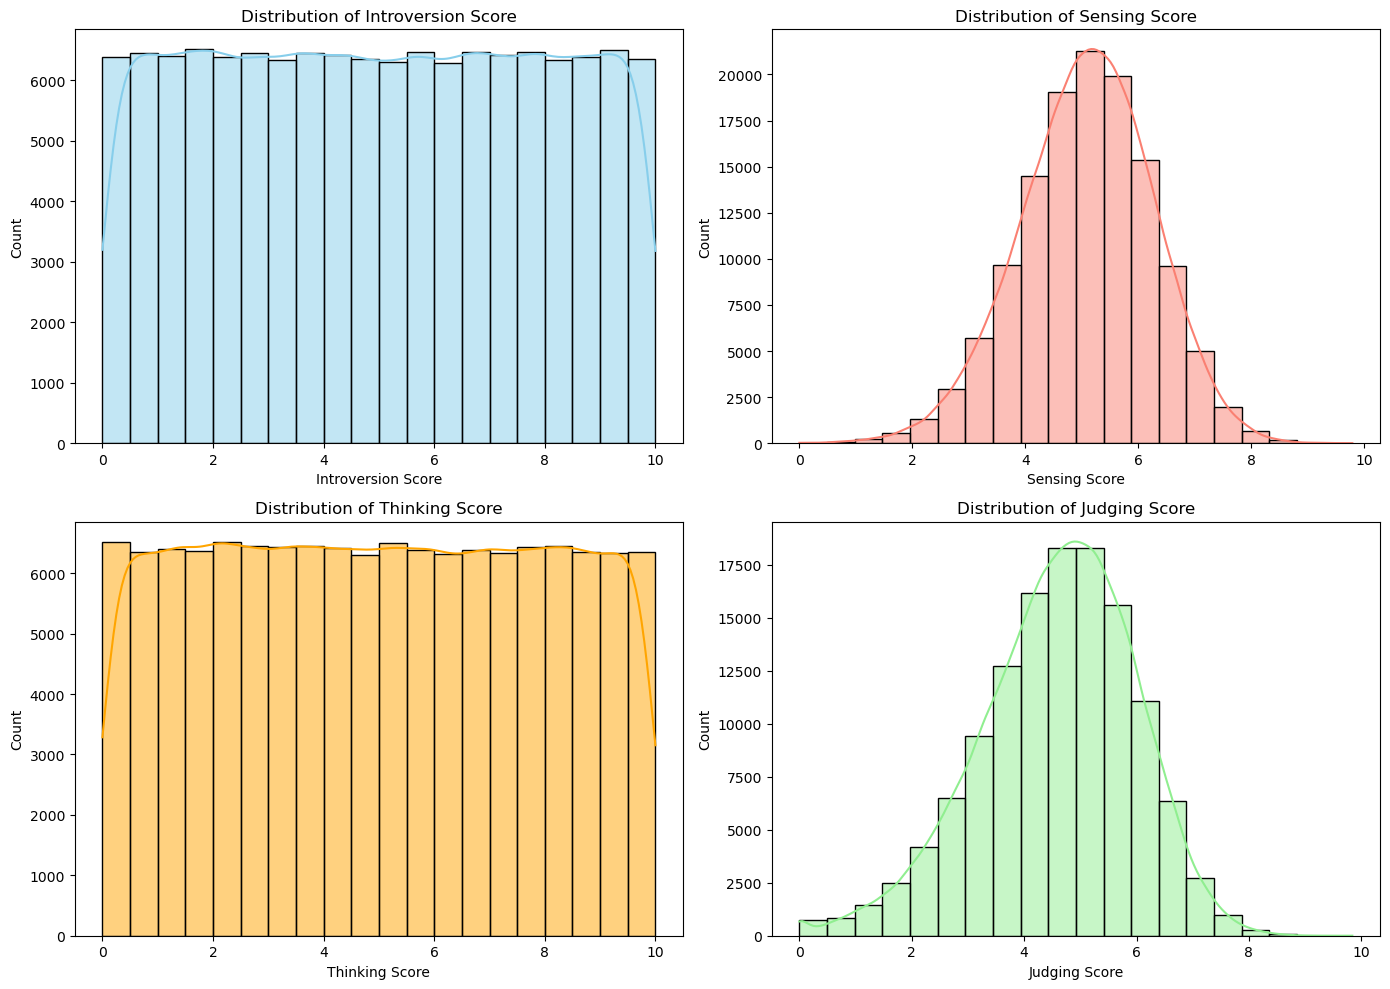

In [15]:
# Create a figsize
plt.figure(figsize=(14, 10))

# Introversion Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Introversion Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Introversion Score')

# Sensing Score Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Sensing Score'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Sensing Score')

# Thinking Score Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Thinking Score'], kde=True, bins=20, color='orange')
plt.title('Distribution of Thinking Score')

# Judging Score Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Judging Score'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Judging Score')

plt.tight_layout()
plt.show()

Plot a correlation heatmap between numerical features/columns

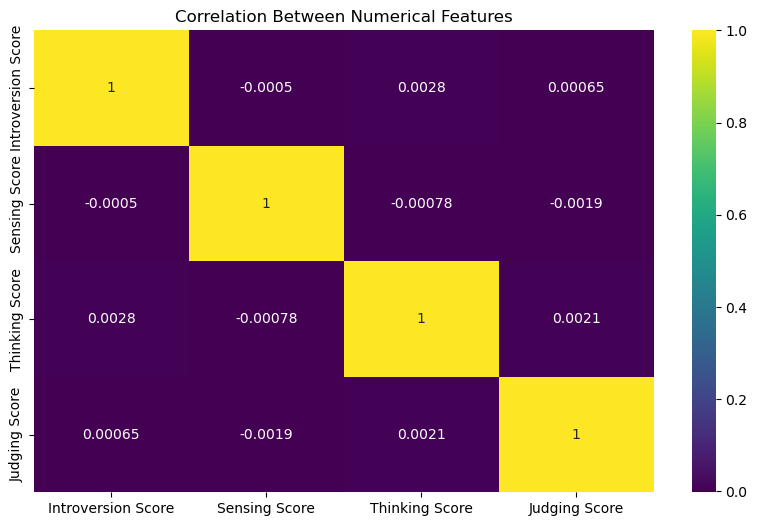

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between Numerical Features')
plt.show()

## Data Preprocessing

Now that we have visualized the data and explored the trends, We can now move on to do the preprocessing of the da, as it is essential to convert our `categorical features into numerical features` to use models like `KNN and Ensemble`

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Check which columns are categorical
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        categorical_columns.append(column)

print("Categorical Columns: ", categorical_columns)

Categorical Columns:  ['Gender', 'Interest', 'Personality']


In [19]:
df.Education # Education is also a categorical column

0         0
1         0
2         0
3         0
4         1
         ..
128056    0
128057    0
128058    1
128059    0
128060    0
Name: Education, Length: 128061, dtype: int64

In [20]:
# Let's create a function to convert the categorical columns into numerical
def encode_columns(df, columns):
    """
    Encode specified columns of a DataFrame using Label Encoding.
    """
    label_encoders = {}
    for column in columns:
        if column in df.columns:
            label_encoders[column] = LabelEncoder()
            df[column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders

df, label_encoders = encode_columns(df,['Gender','Interest','Education','Personality'])

In [21]:
# Check the data again
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,1
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,1
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,1


**Since our data is converted into numerical data, let's once again visualize it.**

In [22]:
# Create a function to visualize the data
def visualize_data(df):
    """
    Visualize the correlation heatmap of the Data.
    """
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.drop("Personality",axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', square=True)
    plt.title('Correlation')
    plt.show()

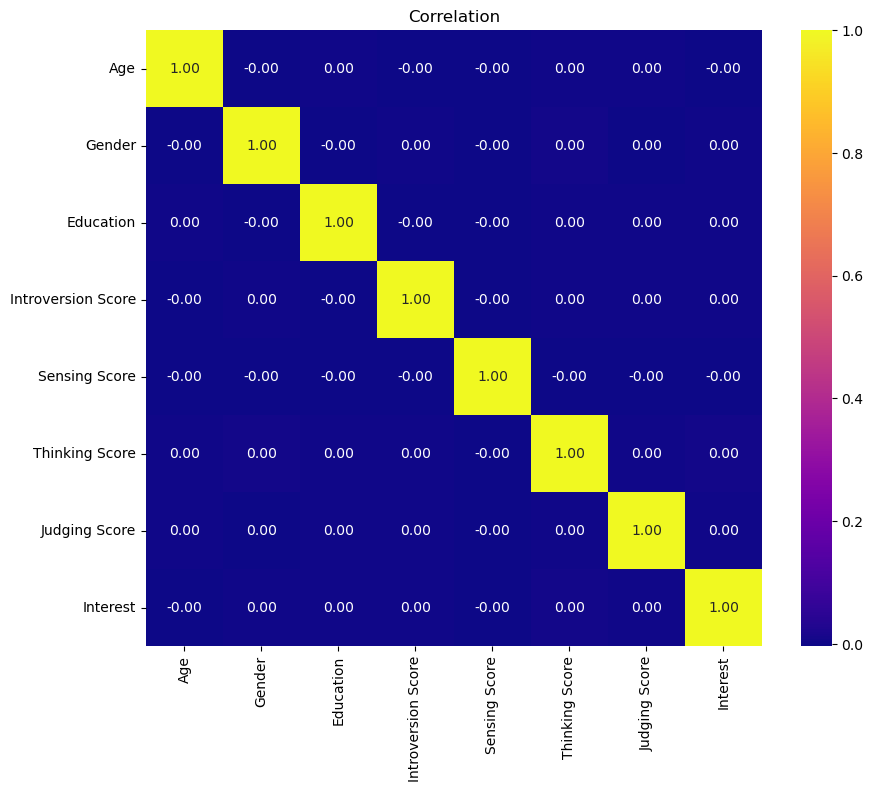

In [23]:
visualize_data(df)

## Modelling

Now we are going to split our data into `train and test sets`,then we are going tune our `hyperparameters and cross validate` them. If our model achieves accuracy of `95%` then we will pursue the project.

In [24]:
# Split the data into x and y
X = df.drop("Personality",axis=1)
y = df["Personality"]

X.shape, y.shape

((128061, 8), (128061,))

In [25]:
# Now Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape

((102448, 8), (102448,))

**Now we've got our data split into training and test sets, it's time to build a machine learning model.**

**We'll train it (find the patterns) on the training set.**

**And we'll test it (use the patterns) on the test set.**

We're going to try 3 different machine learning models:

1. K-Nearest Neighbours Classifier
2. Random Forest Classifier
3. XGBoostClassifier

In [32]:
# Let's put the models into the dictionary
models = {"KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "XGBoostClassifier": XGBClassifier()}

# Create a function that fits and evaluates the models
def fit_score_models(models,X_train,X_test,y_train,y_test):
    """
    fit and evaluate given machine learning models..
    models: a dict of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    #Setup a random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop thorugh model scores
    for name, model in models.items():
        # Fit the model data
        model.fit(X_train,y_train)
        # Evaluate the model and append the model to it's score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [33]:
model_scores = fit_score_models(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'KNN': 0.7858509350720337,
 'Random Forest Classifier': 0.904618748291883,
 'XGBoostClassifier': 0.9028227853043377}

## Model Comparison

<Axes: >

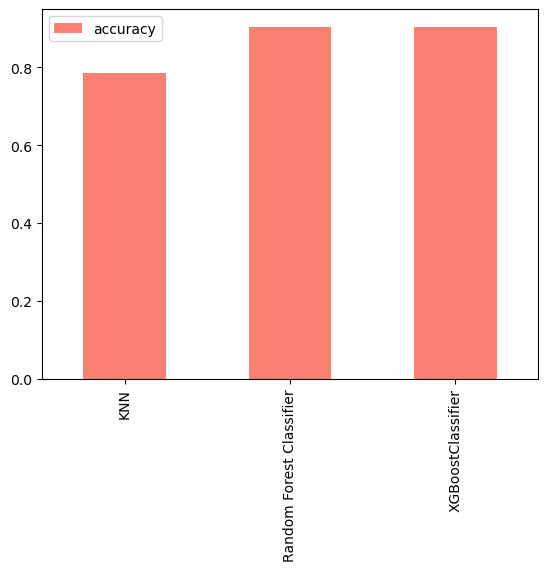

In [34]:
compare_model = pd.DataFrame(model_scores, index=["accuracy"])
compare_model.T.plot.bar(color="salmon")

**Since these predictions are from our baseline model, we cannot rely on them and we will need to tune these models in order to achieve our result**

In [29]:
# Let's tune the KNearestNeighbors
train_scores = []
test_scores = []

# Create a list of different values for N-Neighbors
neighbors = range(1,21)

#Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN Score on the data: 79.49%


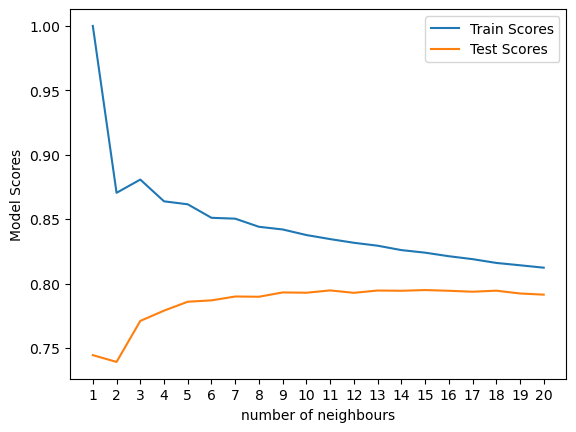

In [30]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbours")
plt.ylabel("Model Scores")
plt.legend();

print(f"Maximum KNN Score on the data: {max(test_scores)*100:.2f}%")

**Even after tuning the KNN we failed to achieve our result. Let's tune Random Forest Classifier using GridSearchCV and RandomizedSearchCV**

## Hyperparameter tuning using RandomizedSearchCV

In [40]:
#Create hyperparameter grid for randomforestclassifier
rf_grid = {'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]}

In [41]:
#Setup the random seed
np.random.seed(42)

#Setup Hyperparameter search for RandomforestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=40,
                           verbose=True)

# Fit Random hyperparameter Search For RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 51),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 101)},
                   verbose=True)

In [42]:
# Check the best parameters
rs_rf.best_params_

{'n_estimators': 48,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 32,
 'criterion': 'entropy',
 'bootstrap': True}

In [43]:
rs_rf.score(X_test,y_test)

0.9068441806894936

## Hyperparameter tuning using GridSearchCV

In [37]:
#Create hyperparameter grid for randomforestclassifier
rf_grid = {'n_estimators': [48],
 'min_samples_split': [4],
 'min_samples_leaf': [7],
 'max_features': ['log2'],
 'max_depth': [32],
 'criterion': ['entropy'],
 'bootstrap': [True]}

gs_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                     param_grid=rf_grid,
                     cv=5,
                    verbose=True)

# Fit Grid hyperparameter Search For RandomForestClassifier
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [32], 'max_features': ['log2'],
                         'min_samples_leaf': [7], 'min_samples_split': [4],
                         'n_estimators': [48]},
             verbose=True)

In [38]:
gs_rf.score(X_test,y_test)

0.9058681138484364

**Since, the random forest classifier is stuck at 90% accuracy we will try some other models like XGBoost**

In [46]:
# Let's install XGBoost
import sys
!conda install --yes --prefix {sys.prefix} xgboost

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [35]:
# Import the model
from xgboost import XGBClassifier
from scipy import stats

## Hyperparameter Tuning of XGBoostClassifier using RandomizedSearchCV

In [38]:
# Now tune the model and use randomized search cv
xgb_grid = {
    'n_estimators': stats.randint(150, 1000),
    'learning_rate': stats.uniform(0.01, 0.6),
    'subsample': stats.uniform(0.3, 0.7),  # Ensures values between 0.3 and 1.0
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'colsample_bytree': stats.uniform(0.5, 0.5),  # Ensures values between 0.5 and 1.0
    'min_child_weight': [1, 2, 3, 4]
}
xgb_rs = RandomizedSearchCV(XGBClassifier(n_jobs=-1),
                            param_distributions=xgb_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True,
                            error_score='raise')
xgb_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B0992BA040>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B0992BA0D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B09127FEB0>},
                   verbose=True)

In [44]:
# Check the best parameters
xgb_rs.best_params_

{'colsample_bytree': 0.719485710352818,
 'learning_rate': 0.05707382880535958,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 266,
 'subsample': 0.35661107663203834}

In [45]:
# Check the score
xgb_rs.score(X_test,y_test)

0.9070784367313474

**Lets save the model just in case if our more experimentation does not successfully tune our model.**

In [94]:
import sys
!conda install --yes --prefix {sys.prefix} joblib

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [95]:
from joblib import dump, load
# Save the model to a file
dump(xgb_rs, filename="rs_xgboost_classifier_model_1.joblib")

['rs_xgboost_classifier_model_1.joblib']

In [96]:
# Load the model and make some predictions
loaded_model = load(filename="rs_xgboost_classifier_model_1.joblib")

## Evaluating our Model beyond accuracy

* ROC Curve and AUC Curve
* Confusion Matrix
* Classification Report, Precision, recall and F1-score

... and it would be great if cross-validation is used if possible. 

To make comparisons and evaluate our trained model first we need to make predictions..

### First make predictions with our tuned model (XGBoostClassifier)

In [47]:
# Make predictions
y_preds = xgb_rs.predict(X_test)
y_preds[:10]

array([ 1,  5,  5,  1,  3,  9,  3,  9,  7, 11], dtype=int64)

In [48]:
y_test[:10]

33507     1
16990     5
91298     1
66353     1
2271      3
16133     9
35054     3
89440     9
59907     7
7713     11
Name: Personality, dtype: int32

### ROC Curve and AUC Score

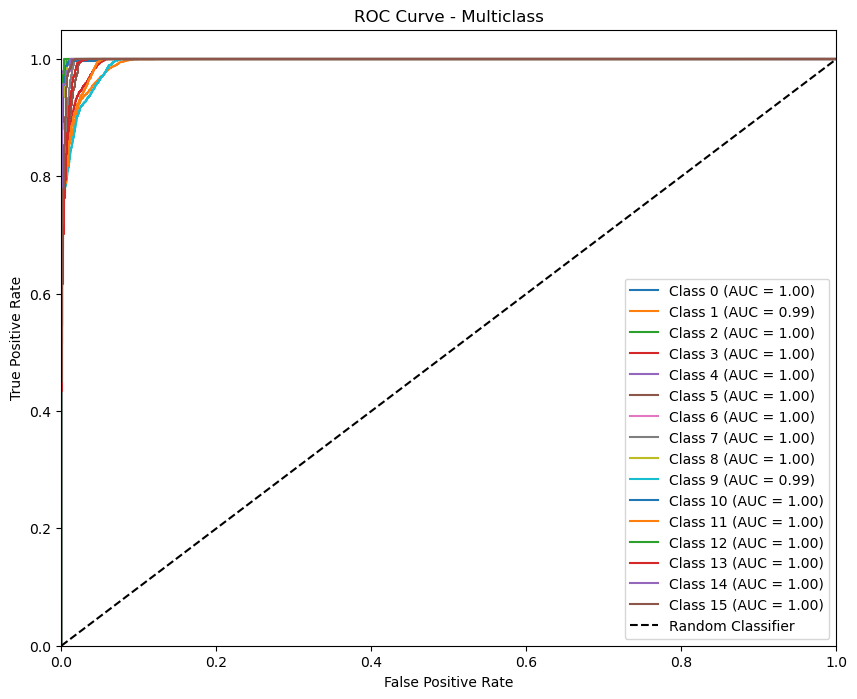

Macro-average AUC: 1.00


In [52]:
# Binarize the output for multi-class problem
n_classes = len(set(y_test))  # Number of classes
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Get predicted probabilities
y_pred_proba = xgb_rs.best_estimator_.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Calculate the average AUC score (macro-average)
macro_roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')
print(f"Macro-average AUC: {macro_roc_auc:.2f}")


**The ROC Curve shows that our model has been trained very well and getting the AUC score of 1 tells us the model is going to predict any custom input very well.**  

### Confusion Matrix

In [53]:
print(confusion_matrix(y_test,y_preds))

[[ 744    1    0    0    7    0    0    0   47    0    0    0    0    0
     0    0]
 [   3 6497    0    3    0   91    0    0    0  361    0    2    0    6
     0    0]
 [   0    0  493    1    0    0    6    0    0    0   30    0    0    0
     1    0]
 [   0   10    2 4618    0    0    0   61    0    0    0  295    0    0
     0    3]
 [  14    0    0    0   78    2    2    0    1    0    0    0    3    1
     0    0]
 [   0   82    0    0    0  834    0    1    0   10    0    0    0   54
     0    0]
 [   0    0    8    0    1    0   61    4    0    0    1    0    0    0
     3    0]
 [   0    0    0   68    0    0    0  524    0    0    0    7    0    0
     0   34]
 [  39    0    0    0    1    1    0    0  568    1    0    0    1    0
     0    0]
 [   0  388    0    0    0   11    0    0    6 4433    0    3    0   54
     0    0]
 [   0    0   32    0    0    0    0    0    5    0  316    2    1    0
     5    1]
 [   0    1    0  296    0    0    0    6    0    3    2 3070    

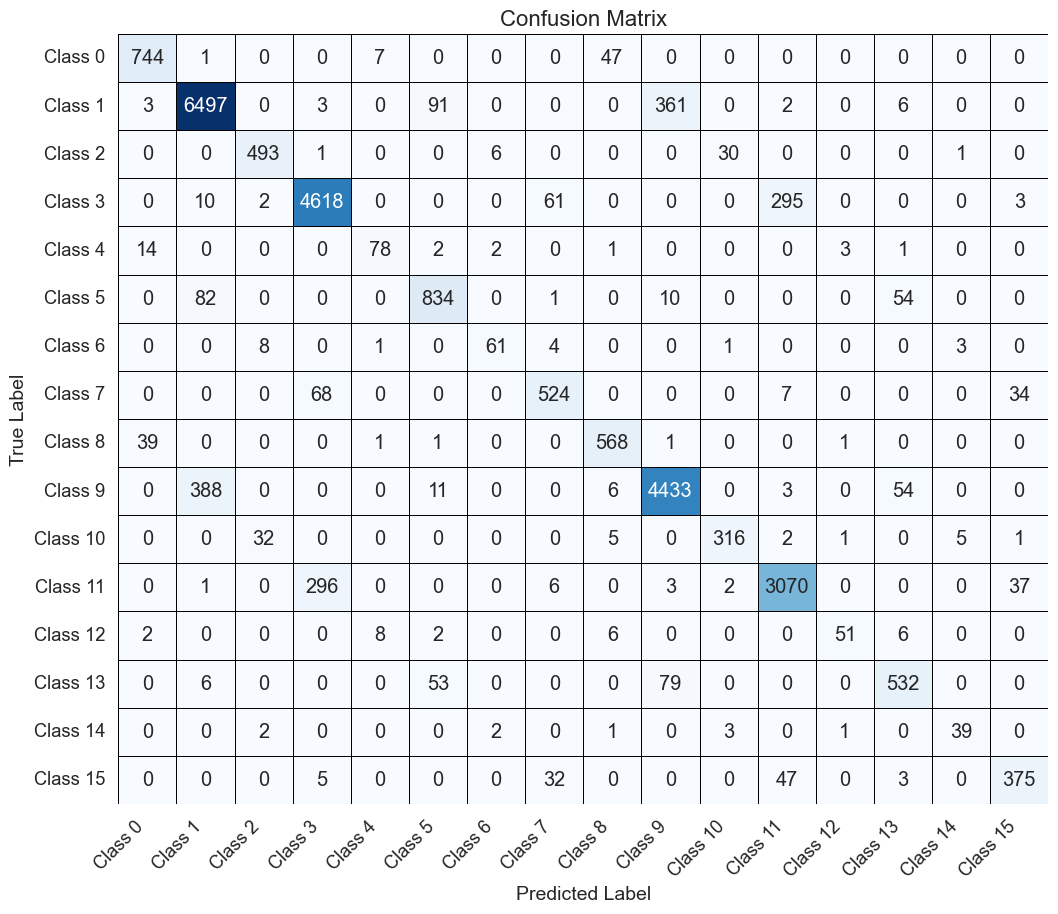

In [59]:
# Visualize the confusion matrix
sns.set(font_scale=1.2)  # Adjust the font scale for better readability

def plot_conf_mat(y_test, y_preds, class_names):
    """
    Plots a confusion matrix using Seaborn's Heatmap for a multiclass classification problem.
    
    Args:
    y_test: True labels
    y_preds: Predicted labels
    class_names: List of class names or labels for the matrix
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_preds)
    
    # Create a larger figure for better visualization (adjust figsize based on the number of classes)
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names, yticklabels=class_names, 
                linewidths=0.5, linecolor='black')
    
    # Add labels and title
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Assuming you have the class names in a list
class_names = [f'Class {i}' for i in range(16)]  # Replace with actual class names if available

plot_conf_mat(y_test, y_preds, class_names)

**Now we have got ROC curve and confuison matrix, Let's get a classification report and also cross-validated precsion, recall and f1-score**

In [63]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       799
           1       0.93      0.93      0.93      6963
           2       0.92      0.93      0.92       531
           3       0.93      0.93      0.93      4989
           4       0.82      0.77      0.80       101
           5       0.84      0.85      0.84       981
           6       0.86      0.78      0.82        78
           7       0.83      0.83      0.83       633
           8       0.90      0.93      0.91       611
           9       0.91      0.91      0.91      4895
          10       0.90      0.87      0.89       362
          11       0.90      0.90      0.90      3415
          12       0.89      0.68      0.77        75
          13       0.81      0.79      0.80       670
          14       0.81      0.81      0.81        48
          15       0.83      0.81      0.82       462

    accuracy                           0.91     25613
   macro avg       0.88   

## Making Custom Predictions

Let's check if our model is good at predicting the presonality type of a person

In [113]:
# let's make a function to predict the personality type
def predict_personality(age, gender, education, introversion_score, sensing_score, thinking_score, judging_score, interest_category, model):
    """
    Predicts the personality type based on input features.
    
    Parameters:
    - age: Age of the individual (int)
    - gender: Gender (0 for Male, 1 for Female)
    - education: Education level (0 for Undergraduate or below, 1 for Graduate)
    - introversion_score: Introversion score (float, between 0 and 10)
    - sensing_score: Sensing score (float, between 0 and 10)
    - thinking_score: Thinking score (float, between 0 and 10)
    - judging_score: Judging score (float, between 0 and 10)
    - interest_category: Encoded interest category (int)
    - model: Trained model used for predictions
    
    Returns:
    - Predicted personality type (str)
    """
    # Create a numpy array for the input
    new_input = np.array([[age, gender, education, introversion_score, sensing_score, thinking_score, judging_score, interest_category]])
    
    # Make a prediction
    predicted_personality = model.predict(new_input)
    
    return predicted_personality[0]

predicted_type = predict_personality(18, 1, 0, 6.0, 5.0, 3.0, 8.0, 0, loaded_model)
print(f"Predicted Personality Type: {predicted_type}")

Predicted Personality Type: 0


## Per-Class Performance:
### Class 0:
* Precision, recall, and F1-score are all 0.93, meaning the model is very good at correctly identifying this class.
* The support is 799, indicating that 799 instances of class 0 were in the test set.
### Class 1 to Class 15:
* The model performs consistently well across most classes, particularly for classes like 0, 1, 3, and 11, with high precision, recall, and F1-scores close to 0.90 or above.
* However, the performance drops slightly for classes like 5, 9, 12, 13, 14, and 15, where precision, recall, and F1-scores are lower (around 0.80 to 0.84).
## Summary of Overall Performance:
### Accuracy: 0.91 (91%)

This is the overall proportion of correct predictions out of all predictions, indicating that 91% of the model’s predictions were correct.
### Macro Avg:
Precision: 0.88, Recall: 0.85, F1-score: 0.86.
These metrics are averaged across all classes without taking class imbalance into account. The slightly lower values compared to the weighted average indicate that the model struggles a bit more with certain classes.

### Weighted Avg:
Precision: 0.91, Recall: 0.91, F1-score: 0.91.
These metrics are averaged across all classes, but with weighting based on the support (i.e., the number of instances in each class). Since the test set is dominated by certain classes, the overall performance is boosted by the model's ability to perform well on those more frequent classes.
## Key Insights:
* Strong performance: The model performs very well for the majority of classes, especially those with higher support, such as class 1 (support = 6963) and class 3 (support = 4989), with precision, recall, and F1-scores consistently above 0.90.

* Weaknesses: There are slight performance issues for some less frequent classes, like classes 5, 9, 12, 13, 14, and 15, where precision and recall drop to around 0.80-0.84.

### Lets improve the model's weaknesses by balancing the classes and then check if it made it better.

In [64]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for your multiclass problem
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary for easy lookup
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Print the class weights
print(class_weight_dict)

{0: 2.076199740596628, 1: 0.23333697751539667, 2: 2.8432504440497337, 3: 0.3245476202544478, 4: 14.13465783664459, 5: 1.6626850168787328, 6: 20.39171974522293, 7: 2.3706034801925213, 8: 2.774263431542461, 9: 0.32312272910779166, 10: 4.109756097560975, 11: 0.46679303054603777, 12: 21.631756756756758, 13: 2.2982770997846376, 14: 29.92056074766355, 15: 3.3210580912863072}


In [66]:
# Assign sample weights based on class weights
sample_weights = np.array([class_weight_dict[label] for label in y_train])
# Initialize the model
xgb_model = XGBClassifier(n_jobs=-1)

# Fit the model with sample weights
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
xgb_model.score(X_test,y_test)

0.8949361652285949

In [70]:
# Define the hyperparameter grid
xgb_grid = {
    'n_estimators': stats.randint(150, 1000),
    'learning_rate': stats.uniform(0.01, 0.6),
    'subsample': stats.uniform(0.3, 0.7),  # Ensures values between 0.3 and 1.0
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'colsample_bytree': stats.uniform(0.5, 0.5),  # Ensures values between 0.5 and 1.0
    'min_child_weight': [1, 2, 3, 4]
}
# Set up the RandomizedSearchCV
xgb_rs = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1), 
    param_distributions=xgb_grid, 
    cv=5, 
    n_iter=20, 
    verbose=1, 
    random_state=42,
    error_score='raise'
)

# Fit RandomizedSearchCV with sample weights
xgb_rs.fit(X_train, y_train, sample_weight=sample_weights)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B0A503BC40>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B0A3AE12B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B0A3AE1850>},
                   random_state=42, verbose=1)

In [71]:
xgb_rs.score(X_test,y_test)

0.8980205364463358

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our model

In [80]:
xgb_rs.best_params_

{'colsample_bytree': 0.7229163764267956,
 'learning_rate': 0.06998494949080172,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 522,
 'subsample': 0.7207805082202461}

In [115]:
clf = XGBClassifier(colsample_bytree=0.7229163764267956,
                    learning_rate=0.06998494949080172,
                    max_depth=5,
                    min_child_weight=4,
                    n_estimators=522,
                    subsample=0.7207805082202461,
                    booster = 'gblinear')

clf.fit(X_train,y_train)

C:\Users\HP\People-personality-project\env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:08] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7229163764267956, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06998494949080172,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=522, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
clf.coef_

array([[-3.34251e-02,  1.31672e-02, -6.37342e-02, -2.83927e-02,
        -3.27600e-02,  1.06789e-02, -6.25696e-02, -2.07787e-02],
       [-2.93156e-03,  5.09805e-02, -3.79573e-02,  4.90952e-03,
        -1.24286e-02,  4.48452e-02, -4.43154e-02,  2.63629e-03],
       [-1.29693e-01,  6.80353e-04, -1.03841e+00, -1.07779e+00,
        -8.29676e-02, -5.84293e-02, -1.09294e+00, -1.13613e+00],
       [ 1.06435e+00,  1.29358e+00,  2.27468e-03,  1.14619e-01,
         8.54835e-01,  1.06807e+00, -1.00047e-01,  7.27518e-02],
       [-6.40689e+00,  3.48058e-01, -7.51922e+00,  2.59686e-01,
        -4.77795e+00,  1.91381e-01, -1.78232e+01,  1.42041e-01],
       [-6.81154e+00,  4.09371e-01, -1.82158e+01,  3.27535e-01,
        -1.76596e+01,  2.72816e-01, -1.74019e+01,  2.23814e-01],
       [ 2.57999e-01,  3.91931e-01,  1.60451e-01,  2.76964e-01,
         1.46529e-01,  2.29990e-01,  7.47885e-02,  1.40436e-01],
       [-8.60556e-01, -8.46857e-01, -9.59756e-01, -9.36931e-01,
        -8.68905e-01, -9.06553e-0

In [89]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': -0.0334251,
 'Gender': 0.0131672,
 'Education': -0.0637342,
 'Introversion Score': -0.0283927,
 'Sensing Score': -0.03276,
 'Thinking Score': 0.0106789,
 'Judging Score': -0.0625696,
 'Interest': -0.0207787}

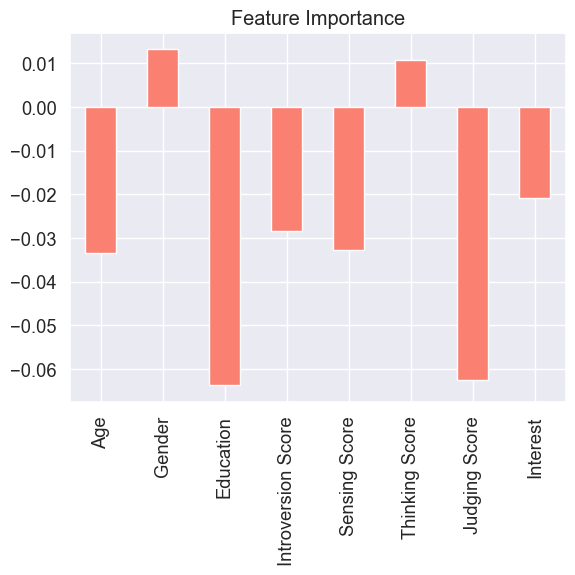

In [91]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False,color="salmon");

## Conclusion
Attempts to balance our model did not lead to improvements, so we will proceed with our fine-tuned model, which consistently outperforms the balanced model and provides reliable predictions. By implementing cross-validation techniques, we aim to ensure that our results are not only accurate but also generalizable to unseen data.

Future work will also focus on investigating potential feature engineering opportunities, which could enhance our model's performance even further. Moreover, we will consider the integration of additional data sources that may enrich the context and improve predictive accuracy.
